# gives the best result

## preds=np.clip(preds,0.0125,0.9875)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


# Load Data

In [ ]:
!unzip '/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip' >&NULL
!unzip '/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip' >&NULL
!rm NULL

In [2]:
import os
os.listdir('.')

['train', '.virtual_documents', 'test']

In [3]:
train_dir="train"
test_dir="test"

In [4]:
from glob import glob
import random

train_list = glob(os.path.join(train_dir,"*"))
test_list = glob(os.path.join(test_dir,"*"))
test_list=sorted(test_list)
print( "Training Images:",len(train_list) )
print( "Testing Images:",len(test_list) )

Training Images: 25000
Testing Images: 12500


In [5]:
# import pickle as pkl

# with open('../input/training-list-of-cat-dog-images/new_train_list.pkl', 'rb') as f:
#     new_train_list=pkl.load(f)
# len(new_train_list)

In [6]:
# bad_imgs_list=[]
# for a in train_list:
#     if a not in new_train_list:
#         bad_imgs_list.append(a)
# bad_imgs_list

In [7]:
bad_imgs_list=['train/cat.11565.jpg',
 'train/cat.7564.jpg',
 'train/dog.5584.jpg',
 'train/cat.8456.jpg',
 'train/cat.8047.jpg',
 'train/dog.8736.jpg',
 'train/cat.10029.jpg',
 'train/dog.12223.jpg',
 'train/dog.10797.jpg',
 'train/cat.9171.jpg',
 'train/cat.5351.jpg',
 'train/dog.10747.jpg',
 'train/dog.2614.jpg',
 'train/dog.9188.jpg',
 'train/dog.11299.jpg',
 'train/dog.4334.jpg',
 'train/dog.11248.jpg',
 'train/dog.7727.jpg',
 'train/cat.7487.jpg',
 'train/cat.9770.jpg',
 'train/cat.7111.jpg',
 'train/cat.4085.jpg',
 'train/cat.5355.jpg',
 'train/cat.7920.jpg',
 'train/cat.2433.jpg',
 'train/cat.11222.jpg',
 'train/cat.5418.jpg',
 'train/cat.2663.jpg',
 'train/cat.4688.jpg',
 'train/cat.8504.jpg',
 'train/dog.6475.jpg',
 'train/dog.7.jpg',
 'train/dog.2130.jpg',
 'train/dog.9517.jpg',
 'train/dog.10733.jpg',
 'train/cat.10700.jpg',
 'train/cat.3822.jpg',
 'train/cat.7968.jpg',
 'train/cat.1450.jpg',
 'train/cat.9250.jpg',
 'train/dog.2877.jpg',
 'train/dog.10225.jpg',
 'train/cat.10181.jpg',
 'train/cat.10863.jpg',
 'train/cat.2939.jpg',
 'train/cat.2520.jpg',
 'train/dog.10297.jpg',
 'train/dog.4180.jpg',
 'train/dog.5336.jpg',
 'train/dog.7798.jpg',
 'train/dog.10801.jpg',
 'train/dog.4507.jpg',
 'train/dog.8671.jpg',
 'train/dog.10237.jpg',
 'train/dog.12376.jpg',
 'train/dog.1773.jpg',
 'train/dog.3147.jpg',
 'train/dog.6957.jpg',
 'train/dog.3503.jpg',
 'train/dog.7076.jpg',
 'train/cat.10712.jpg',
 'train/cat.11184.jpg',
 'train/cat.8289.jpg']
len(bad_imgs_list)

63

In [8]:
for a in bad_imgs_list:
    del train_list[train_list.index(a)]

In [9]:
print( "Training Images:",len(train_list) )

Training Images: 24937


In [10]:
train_list[:4],test_list[:4]

(['train/dog.1805.jpg',
  'train/cat.3519.jpg',
  'train/cat.6317.jpg',
  'train/dog.5544.jpg'],
 ['test/1.jpg', 'test/10.jpg', 'test/100.jpg', 'test/1000.jpg'])

In [11]:
from fastai.vision.all import *
np.random.seed(54)

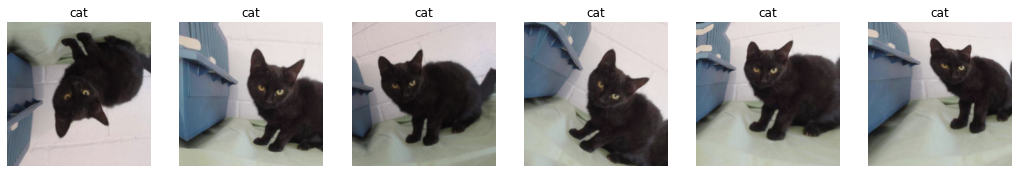

In [12]:

dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=lambda x:x.rsplit('/',1)[1].split('.',1)[0] ,
                 item_tfms=Resize(224),
                 batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(mult=1,max_rotate=50,flip_vert=True)],  # underfit still good results
#                  batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms(mult=1.8)],
#                  batch_tfms=[Normalize.from_stats(*imagenet_stats)],
                 splitter  = RandomSplitter(valid_pct=0.1),
)

# ds=dblock.datasets(train_list)
# print(ds[0])
# del ds
dls=dblock.dataloaders(train_list,bs=64)
dls.train.show_batch(max_n=6,nrows=1,unique=True)

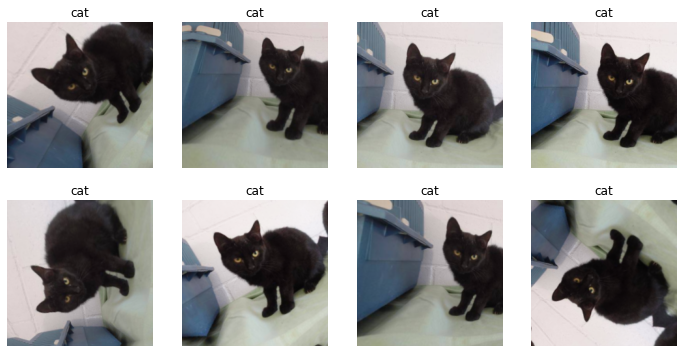

In [13]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

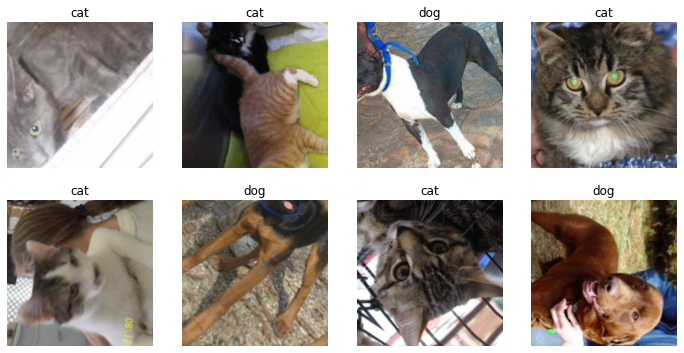

In [14]:
dls.train.show_batch(max_n=8,nrows=2)

## ResNet152

In [15]:
learn=vision_learner(dls,models.resnet152,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.116978,0.013305,0.004813,04:51
1,0.071095,0.013511,0.003209,04:49
2,0.061743,0.020398,0.006819,04:50
3,0.056708,0.021429,0.006819,04:50
4,0.044820,0.009613,0.002808,04:49
5,0.025061,0.008307,0.002808,04:50
6,0.028642,0.008214,0.002407,04:47
7,0.023363,0.010170,0.004412,04:49


Better model found at epoch 0 with valid_loss value: 0.013305258937180042.


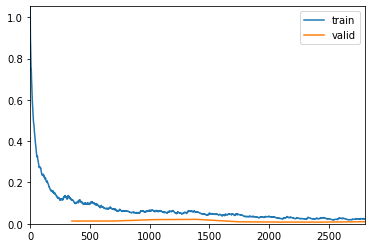

Better model found at epoch 4 with valid_loss value: 0.009613297879695892.
Better model found at epoch 5 with valid_loss value: 0.008306808769702911.
Better model found at epoch 6 with valid_loss value: 0.008214052766561508.
Pretraining Done.


In [16]:
learn.fit_one_cycle(8,cbs=[SaveModelCallback(fname='best_model'),ShowGraphCallback()])
print("Pretraining Done.")

In [17]:
learn.unfreeze()

### Fine Tuning

reduce max lr with oldlr/10 and find lower bound of lr using learn.find_lr()

epoch,train_loss,valid_loss,error_rate,time
0,0.017444,0.009180,0.003610,05:57
1,0.020418,0.009518,0.002808,05:31
2,0.021651,0.006030,0.003209,05:32
3,0.019393,0.007065,0.002407,05:31
4,0.013838,0.007108,0.002006,05:32
5,0.015017,0.007274,0.003209,05:31
6,0.011606,0.006327,0.002006,05:31
7,0.013046,0.006518,0.002006,05:32


Better model found at epoch 0 with valid_loss value: 0.009180039167404175.


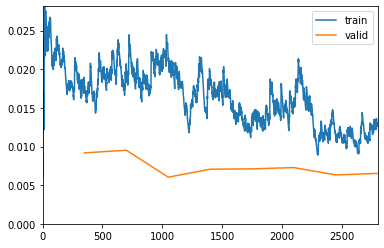

Better model found at epoch 2 with valid_loss value: 0.006029724143445492.


In [19]:
learn.fit_one_cycle(8,lr_max=slice(1e-7,3e-4),cbs=[SaveModelCallback(fname='best_model'),ShowGraphCallback()])

### Model Interpretation

In [20]:
interp=ClassificationInterpretation.from_learner(learn)

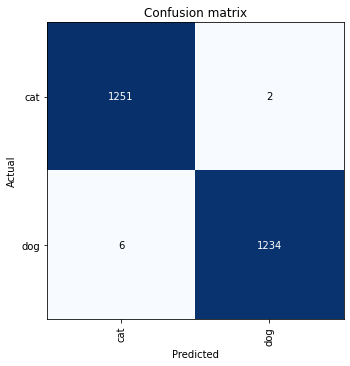

In [21]:
interp.plot_confusion_matrix(figsize=(5,5))

### get outputs

In [23]:
test_dl = dls.test_dl(test_list)

In [24]:
preds=learn.get_preds(dl=test_dl)

In [25]:
test_ids=list(map(lambda x: x.rsplit("/",1)[1].rsplit(".",1)[0],test_list))

In [26]:
print(dls.vocab)
preds[0]

['cat', 'dog']


TensorBase([[4.4249e-06, 1.0000e+00],
        [9.9936e-01, 6.4229e-04],
        [1.0000e+00, 1.8466e-07],
        ...,
        [5.7893e-09, 1.0000e+00],
        [1.0000e+00, 3.3371e-07],
        [1.0000e+00, 3.2598e-06]])

In [27]:
preds[0][:,1]  # we are taking the dog probability

TensorBase([1.0000e+00, 6.4229e-04, 1.8466e-07,  ..., 1.0000e+00, 3.3371e-07,
        3.2598e-06])

In [28]:
import numpy as np
preds=np.array(preds[0][:,1])

In [29]:
preds

array([9.9999559e-01, 6.4228877e-04, 1.8465701e-07, ..., 1.0000000e+00,
       3.3370577e-07, 3.2598341e-06], dtype=float32)

In [ ]:
np.savetxt('resnet152_preds.csv',preds,delimiter=",")

In [30]:
import pandas as pd

#if os.path.exists('submission.csv'): os.remove('submission.csv')
df=pd.DataFrame({"id":test_ids,"label":preds})
df.to_csv("resnet152_submission.csv",mode='a',index=False,header=True)

In [31]:
#if os.path.exists('clipping_0.05_submission.csv'): os.remove('clipping_0.05_submission.csv')
df=pd.DataFrame({"id":test_ids,"label":np.clip(preds,0.05,0.95)})
df.to_csv("resnet152_clipping_0.05_submission.csv",mode='a',index=False,header=True)


In [32]:
#### gives the best result
#if os.path.exists('clipping_0.0125_submission.csv'): os.remove('clipping_0.0125_submission.csv')
df=pd.DataFrame({"id":test_ids,"label":np.clip(preds,0.0125,0.9875)})
df.to_csv("resnet152_clipping_0.0125_submission.csv",mode='a',index=False,header=True)

In [ ]:
bad_dl = dls.test_dl(bad_imgs_list)

In [ ]:
bad_dl.show_batch(max_n=len(bad_imgs_list),ncols=5)